# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           4.22e-42
Time:                        16:42:21   Log-Likelihood:                 2.7283
No. Observations:                  50   AIC:                             2.543
Df Residuals:                      46   BIC:                             10.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9106      0.081     60.313      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.39680762  4.85020236  5.26965315  5.63251611  5.92431943  6.14114104
  6.29025297  6.38892658  6.46159498  6.53583864  6.63785409  6.78814986
  6.99817698  7.26844763  7.58845099  7.9383801   8.29238615  8.62282531
  8.90480057  9.12025223  9.26092506  9.32972461  9.34023985  9.31451051
  9.27940606  9.26221109  9.28614255  9.36653527  9.50832247  9.7052253
  9.94078436 10.191064   10.42858484 10.62683858 10.76464321 10.82962318
 10.82024266 10.74605787 10.62614701 10.48597579 10.35321347 10.25318687
 10.20471928 10.21703779 10.28825738 10.40569053 10.54793185 10.68837484
 10.79958329 10.85779899]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.83401897 10.69855806 10.46771023 10.17860735  9.88012805  9.62093051
  9.43753922  9.34540256  9.33511042  9.37469823]


## Plot comparison

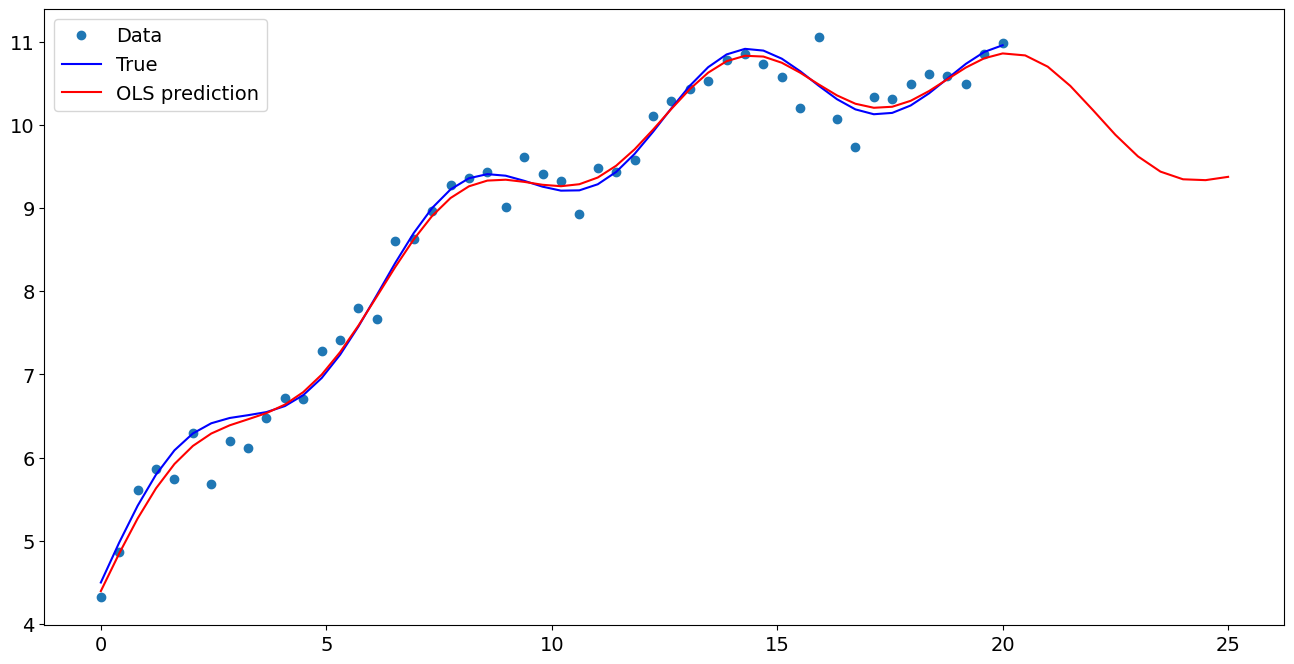

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.910649
x1                  0.509620
np.sin(x1)          0.415490
I((x1 - 5) ** 2)   -0.020554
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.834019
1    10.698558
2    10.467710
3    10.178607
4     9.880128
5     9.620931
6     9.437539
7     9.345403
8     9.335110
9     9.374698
dtype: float64